<a href="https://colab.research.google.com/github/vaish-77/Image-Forgery-Detection/blob/main/CP302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the google drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#for importing data from drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing the dataset

In [ ]:
import os
from pathlib import Path
import keras.utils as image

#getting the directory names and filenames from the CV set
image_data= []
labels={"Au":0,"Tp":1}

count = 0
for dirname,_,filenames in os.walk('/content/gdrive/MyDrive/BTP data'):
  type_of_image = (str(dirname).split('/')[-1])
  for filename in filenames:
    if count%20 == 0 :
      # print(os.path.join(dirname,filename))
      img = image.load_img(os.path.join(dirname,filename),target_size=(256,256))
      image_array = image.img_to_array(img)/255
      image_data.append((image_array,type_of_image))
      # directory of loaded image
      print("processing image: " + str(dirname)+" / "+str(filename))
    count += 1

print("data is loaded")

processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_00099.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_00096.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_20027.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_20035.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_20063.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_20071.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30007.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30011.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30032.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30065.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30094.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30085.jpg
processing image: /content/gdrive/MyDrive/BTP data/Au / Au_sec_30107.jpg
processing image: /content/gdrive/MyDrive/BTP data/

In [ ]:
print("number of trainning images =",end=" ")
print(len(image_data))

number of trainning images = 631


# Data Preprocessing

In [ ]:
import random
random.seed(1)
# random shuffling of image data
random.shuffle(image_data)
train = image_data[:int(0.90*len(image_data))]
validation = image_data[int(0.90*len(image_data)):]

In [ ]:
# Spliting of x_train and y_train
x_train = np.asarray([data[0] for data in train])
y_train_decoded = np.asarray([labels[data[1]] for data in train])
y_train = tf.keras.utils.to_categorical(y_train_decoded) # encoding to one hot vector
# Spliting of x_val and y_val
x_val = np.asarray([data[0] for data in validation])
y_val_decoded = np.asarray([labels[data[1]] for data in validation])
y_val = tf.keras.utils.to_categorical(y_val_decoded)  # encoding to one hot vector
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

567
567
64
64


Counter({0: 342, 1: 225})
Counter({0: 33, 1: 31})


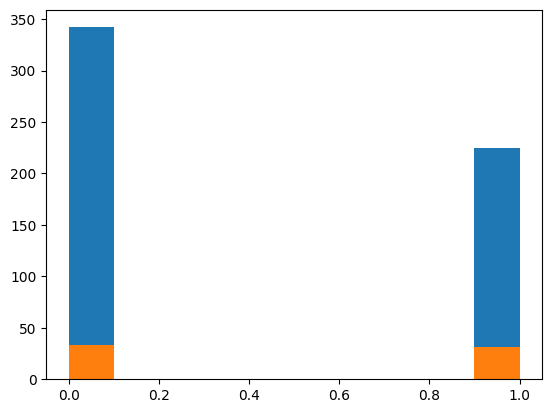

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
plt.hist(y_train_decoded)
plt.plot()
print(Counter(y_train_decoded))
plt.hist(y_val_decoded)
plt.plot()
print(Counter(y_val_decoded))

Au


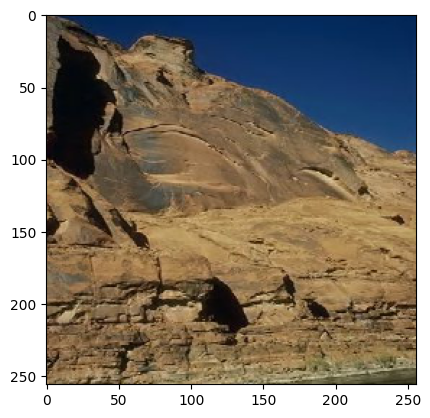

In [ ]:
# printing a trainning image
plt.imshow(image_data[8][0])
print(image_data[8][1])

In [ ]:

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2,  activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 60, 60, 128)       0

In [ ]:
# from tensorflow.keras.preprocessing.image  import ImageDataGenerator
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip= True,  # randomly flip images
#         vertical_flip= True )  # randomly flip images


# datagen.fit(x_train)

In [ ]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(x_train, y_train,
                              epochs = 60, validation_data = (x_val,y_val))


Epoch 1/60
18/18 [==============================] - 144s 8s/step - loss: 0.9192 - accuracy: 0.5855 - val_loss: 0.6908 - val_accuracy: 0.5156
Epoch 2/60
18/18 [==============================] - 135s 8s/step - loss: 0.6821 - accuracy: 0.5785 - val_loss: 0.6777 - val_accuracy: 0.5312
Epoch 3/60
18/18 [==============================] - 139s 8s/step - loss: 0.6472 - accuracy: 0.6032 - val_loss: 0.7390 - val_accuracy: 0.5156
Epoch 4/60
18/18 [==============================] - 136s 8s/step - loss: 0.6387 - accuracy: 0.6243 - val_loss: 0.6732 - val_accuracy: 0.5156
Epoch 5/60
18/18 [==============================] - 134s 8s/step - loss: 0.6314 - accuracy: 0.6032 - val_loss: 0.6714 - val_accuracy: 0.5156
Epoch 6/60
18/18 [==============================] - 137s 8s/step - loss: 0.6112 - accuracy: 0.6102 - val_loss: 0.6918 - val_accuracy: 0.5781
Epoch 7/60
18/18 [==============================] - 135s 8s/step - loss: 0.5904 - accuracy: 0.6720 - val_loss: 0.6611 - val_accuracy: 0.5625
Epoch 8/60
18

2/2 - 3s - loss: 1.4730 - accuracy: 0.6562 - 3s/epoch - 2s/step


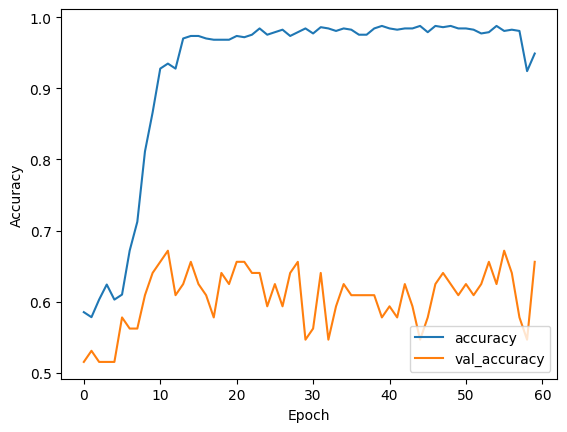

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)



2/2 [==============================] - 3s 1s/step


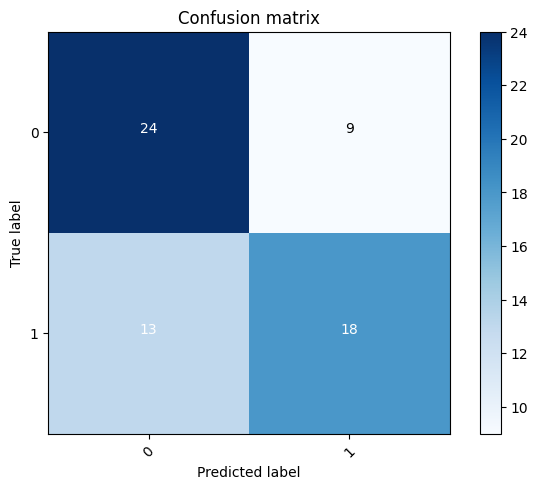

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))



In [ ]:
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=1)

2/2 [==============================] - 3s 1s/step - loss: 1.4730 - accuracy: 0.6562


In [ ]:
model.save("model")
print("Saved model to disk")

Saved model to disk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/model')

In [ ]:
import shutil
shutil.make_archive('model', 'zip', 'model')